#Importantando a base de dados

In [5]:
import pandas as pd

data = pd.read_json('Telco-Customer-Churn-limpeza.json')
data.head()

,customerID,Churn,Genero,MelhorIdade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,MultiplosTelefones,ServicoInternet,...,TechSupport,StreamingTV,StreamingMovies,TipoContrato,TipoDaFatura,FormaDePagamento,Cobranca.Mes,Cobranca.Total,GastoDiario30Dias,GastoDiario365Dias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,2.156712
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,1.969315
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,2.429589
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,3.221918
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,2.758356


In [9]:
 #Vou utilizar o Seaborn para verificar se o valores pagos influenciam na variável Churn

 import seaborn as sns
 !pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, numpy, matplotlib, pandas
Required-by: missingno


#Analise 1 :: Churn vs Cobrança Mensal

In [12]:
data.columns

Index(['customerID', 'Churn', 'Genero', 'MelhorIdade', 'Conjuge',
       'Dependentes', 'MesesContrato', 'ServicoTelefonico',
       'MultiplosTelefones', 'ServicoInternet', 'SergurancaOnline',
       'BackupOnline', 'ProtecaoDevice', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'TipoContrato', 'TipoDaFatura', 'FormaDePagamento',
       'Cobranca.Mes', 'Cobranca.Total', 'GastoDiario30Dias',
       'GastoDiario365Dias'],
      dtype='object')

##Analise Descritiva

In [ ]:
data[data.Churn == 'Yes']

In [21]:
data[data.Churn == 'Yes'].describe()

,MelhorIdade,MesesContrato,Cobranca.Mes,Cobranca.Total,GastoDiario30Dias,GastoDiario365Dias
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094,2.481378,2.447386
std,0.435799,19.531123,24.666053,1890.822994,0.822202,0.810939
min,0.000000,1.000000,18.850000,18.850000,0.628333,0.619726
25%,0.000000,2.000000,56.150000,134.500000,1.871667,1.846027
50%,0.000000,10.000000,79.650000,703.550000,2.655000,2.618630
75%,1.000000,29.000000,94.200000,2331.300000,3.140000,3.096986
max,1.000000,72.000000,118.350000,8684.800000,3.945000,3.890959


In [22]:
data[data.Churn == 'No'].describe()

,MelhorIdade,MesesContrato,Cobranca.Mes,Cobranca.Total,GastoDiario30Dias,GastoDiario365Dias
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.128721,37.569965,61.265124,2549.999497,2.042171,2.014196
std,0.334923,24.113777,31.092648,2329.858843,1.036422,1.022224
min,0.000000,0.000000,18.250000,18.800000,0.608333,0.600000
25%,0.000000,15.000000,25.100000,572.900000,0.836667,0.825205
50%,0.000000,38.000000,64.425000,1679.525000,2.147500,2.118082
75%,0.000000,61.000000,88.400000,4262.850000,2.946667,2.906301
max,1.000000,72.000000,118.750000,8672.450000,3.958333,3.904110


##Análise Visual

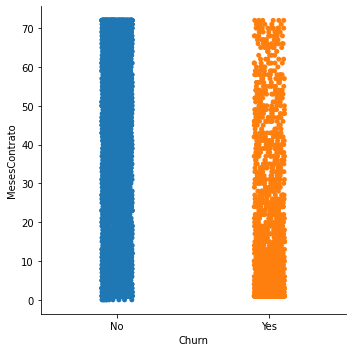

In [23]:
sns.catplot(x='Churn',y='MesesContrato',data=data)

Visualmente, aumenta a chance de Churn até os 20 meses de contrato

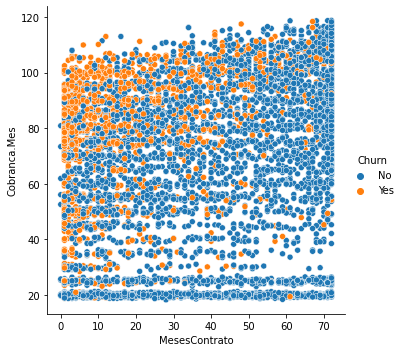

In [25]:
sns.relplot(x='MesesContrato',y='Cobranca.Mes',hue='Churn',data=data)

Visualmente, o valor da cobrança mensal está influenciando no Churn (concentração alta de pontos laranjas com valores acima de 60 no eixo X)

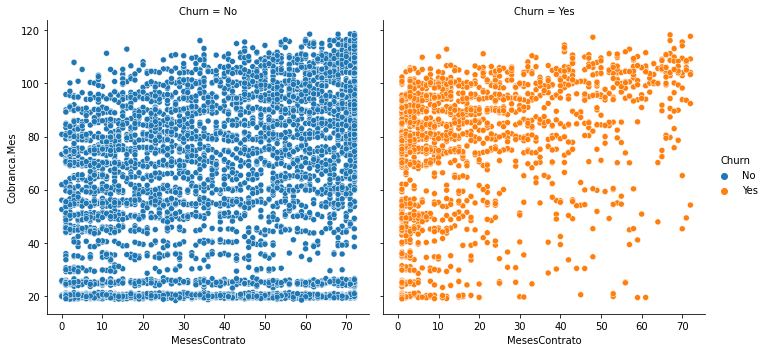

In [26]:
#Deixar o gráfico acima em dois gráficos para facilitar a visualização, incluindo COL
sns.relplot(x='MesesContrato',y='Cobranca.Mes',hue='Churn',col='Churn',data=data)

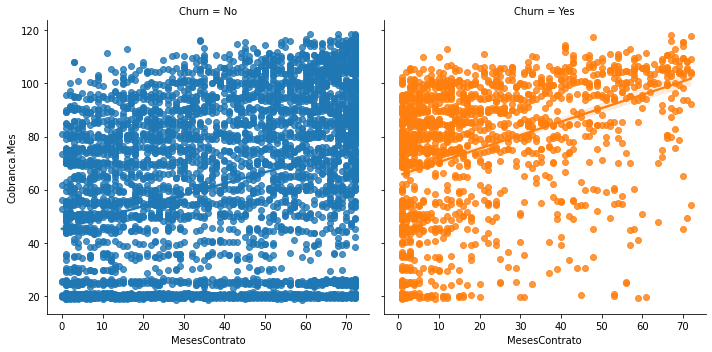

In [27]:
#Traçando uma linha nos gráficos
sns.lmplot(x='MesesContrato',y='Cobranca.Mes',hue='Churn',col='Churn',data=data)

##Teste de hipótese

[Aula com o tema](https://cursos.alura.com.br/course/data-visualization-com-seaborn/task/47243)

#Análise Visual II

In [39]:
data.head()

,customerID,Churn,Genero,MelhorIdade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,MultiplosTelefones,ServicoInternet,...,TechSupport,StreamingTV,StreamingMovies,TipoContrato,TipoDaFatura,FormaDePagamento,Cobranca.Mes,Cobranca.Total,GastoDiario30Dias,GastoDiario365Dias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,2.156712
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,1.969315
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,2.429589
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,3.221918
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,2.758356


In [42]:
data.TipoContrato.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

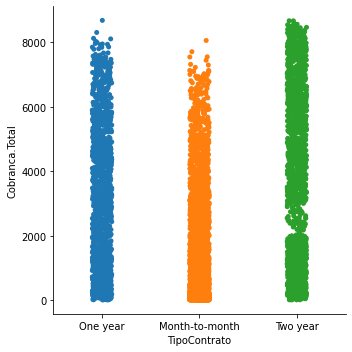

In [43]:
#Vamos verificar com qual Tipo de Contrato as pessoas gastam mais com a Alura Voz (Cobranca Total)

sns.catplot(x='TipoContrato',y='Cobranca.Total',data=data)

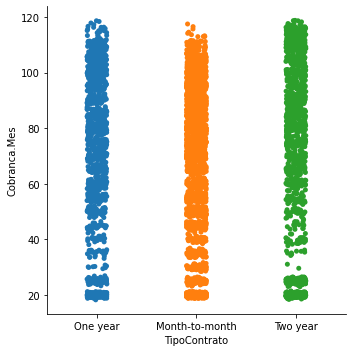

In [44]:
#Vamos verificar com qual Tipo de Contrato as pessoas gastam mais com a Alura Voz (Cobrança Mensal)

sns.catplot(x='TipoContrato',y='Cobranca.Mes',data=data)

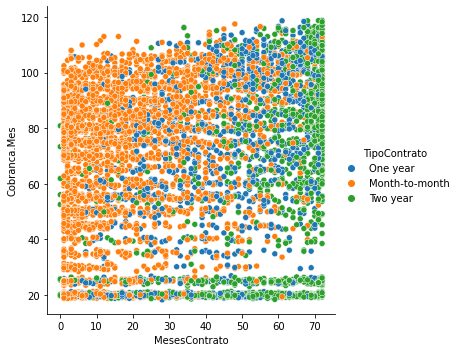

In [45]:
sns.relplot(x='MesesContrato',y='Cobranca.Mes',hue='TipoContrato',data=data)

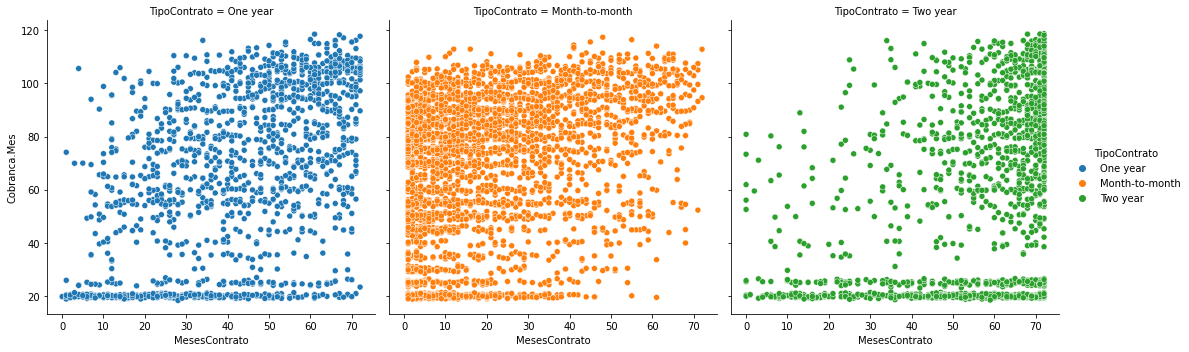

In [46]:
sns.relplot(x='MesesContrato',y='Cobranca.Mes',hue='TipoContrato',col='TipoContrato',data=data)

In [50]:
data.groupby(['FormaDePagamento']).mean()

,MelhorIdade,MesesContrato,Cobranca.Mes,Cobranca.Total,GastoDiario30Dias,GastoDiario365Dias
FormaDePagamento,,,,,,
Bank transfer (automatic),0.150907,43.656736,67.192649,3075.384942,2.239755,2.209073
Credit card (automatic),0.145204,43.269382,66.512385,3069.414849,2.217080,2.186709
Electronic check,0.251163,25.174630,76.255814,2090.868182,2.541860,2.507040
Mailed check,0.058313,21.830025,43.917060,1049.427605,1.463902,1.443849


In [ ]:
data.groupby(['TipoContrato']).mean()

In [54]:
print('Quantidade por Forma de Pagamento:')
data.FormaDePagamento.value_counts()

Quantidade por Forma de Pagamento:


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: FormaDePagamento, dtype: int64

In [53]:
print('Quantidade por Tipo do Contrato:')
data.TipoContrato.value_counts()

Quantidade por Tipo do Contrato:


Month-to-month    3875
Two year          1695
One year          1473
Name: TipoContrato, dtype: int64

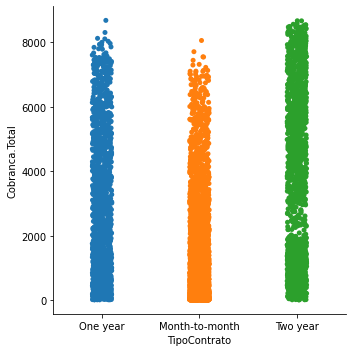

In [59]:
sns.catplot(x='TipoContrato',y='Cobranca.Total',data=data)

In [65]:
#sns.catplot(x='TipoContrato',y='Cobranca.Total',kind='swarm',data=data)

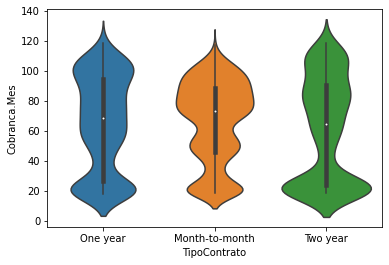

In [61]:
sns.violinplot(x='TipoContrato',y='Cobranca.Mes',data=data)

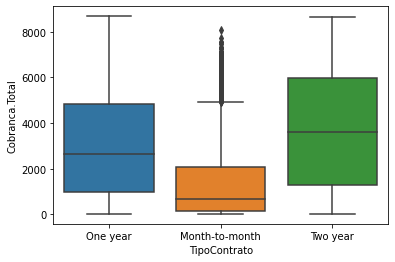

In [62]:
sns.boxplot(x='TipoContrato',y='Cobranca.Total',data=data)

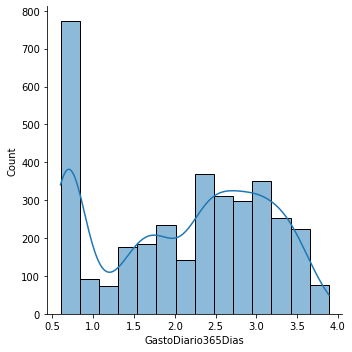

In [76]:
male = data.query("Genero == 'Male'").GastoDiario365Dias
sns.displot(male, kde=True)

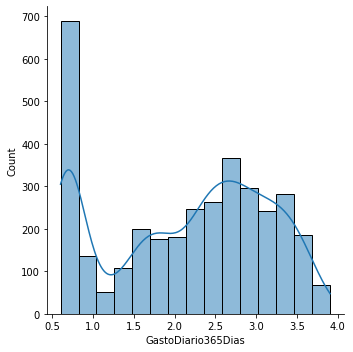

In [77]:
female = data.query("Genero == 'Female'").GastoDiario365Dias
sns.displot(female, kde=True)